# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
units = "Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# city_url = f"{url}?q=London&appid={weather_api_key}"
# city_weather = requests.get(city_url).json()
# print(json.dumps(city_weather, indent=4, sort_keys=True))

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lon"]
        city_lng = city_weather["coord"]["lat"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | saint-joseph
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | saipan
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | kiunga
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | colchani
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | namibe
Processing Record 13 of Set 1 | kampong speu
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | malakal
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | san luis de la loma
Processing Record 20 of Set 1 | vedasandur
Processing Record 21 of Set 1 | margaret river
Processing Record

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [8]:
# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-72.4875,-51.7236,0.25,100,75,2.57,CL,1687620270
1,saint-joseph,55.6167,-21.3667,21.21,86,64,4.69,RE,1687620270
2,blackmans bay,147.3167,-43.0167,6.07,92,90,2.79,AU,1687620159
3,saipan,145.7010,15.1355,28.39,100,20,4.12,MP,1687620271
4,vorgashor,63.9500,67.5833,10.68,47,38,5.38,RU,1687620271
5,kiunga,141.2906,-6.1219,23.50,96,100,0.96,PG,1687620272
6,adamstown,-130.1015,-25.0660,19.75,57,95,5.28,PN,1687620272
7,ilulissat,-51.1000,69.2167,5.01,75,75,3.60,GL,1687620273
8,colchani,-66.9333,-20.3000,5.10,25,0,2.99,BO,1687620273
9,kavaratti,72.6420,10.5669,28.94,75,100,7.68,IN,1687620273


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/victo/Documents/Bootcamp/Week 6/python-api-challenge/Starter_Code/output_data/cities.csv", 
                    index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/victo/Documents/Bootcamp/Week 6/python-api-challenge/Starter_Code/output_data/cities.csv", 
                           index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-72.4875,-51.7236,0.25,100,75,2.57,CL,1687620270
1,saint-joseph,55.6167,-21.3667,21.21,86,64,4.69,RE,1687620270
2,blackmans bay,147.3167,-43.0167,6.07,92,90,2.79,AU,1687620159
3,saipan,145.7010,15.1355,28.39,100,20,4.12,MP,1687620271
4,vorgashor,63.9500,67.5833,10.68,47,38,5.38,RU,1687620271


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

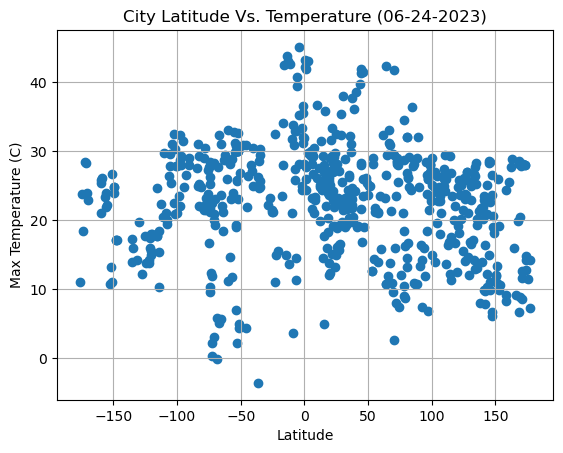

In [11]:
# Build scatter plot for latitude vs. temperature
latAxis = city_data_df["Lat"]
tempAxis = city_data_df["Max Temp"]
plt.scatter(latAxis, tempAxis)
# Incorporate the other graph properties
plt.title("City Latitude Vs. Temperature (06-24-2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/victo/Documents/Bootcamp/Week 6/python-api-challenge/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

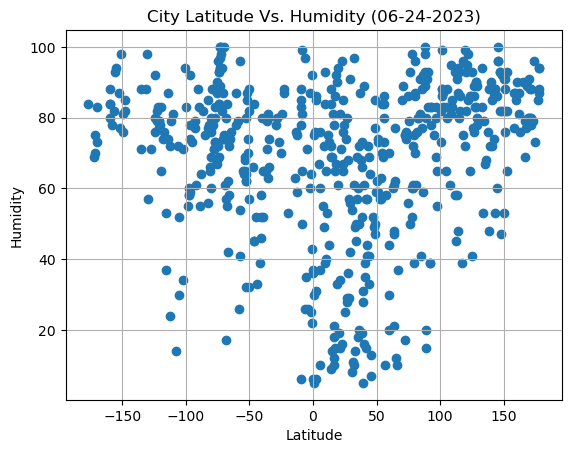

In [11]:
latAxis = city_data_df["Lat"]
humAxis = city_data_df["Humidity"]
plt.scatter(latAxis, humAxis)
# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (06-24-2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/victo/Documents/Bootcamp/Week 6/python-api-challenge/Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

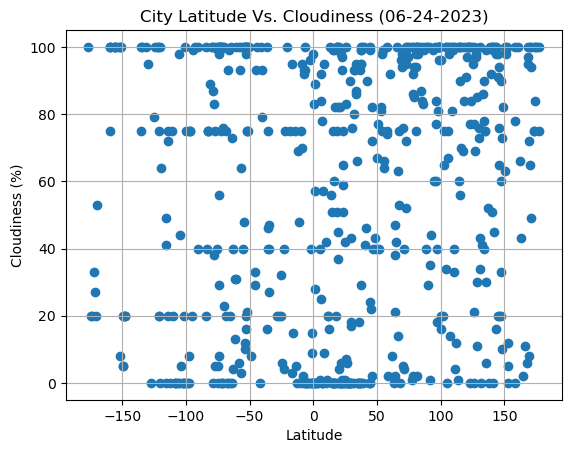

In [12]:
# Build the scatter plots for latitude vs. cloudiness
latAxis = city_data_df["Lat"]
cloudAxis = city_data_df["Cloudiness"]
plt.scatter(latAxis, cloudAxis)
# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (06-24-2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/victo/Documents/Bootcamp/Week 6/python-api-challenge/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

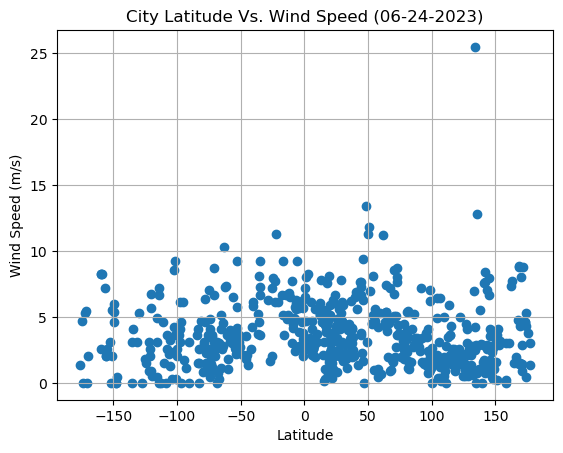

In [13]:
# Build the scatter plots for latitude vs. wind speed
latAxis = city_data_df["Lat"]
windAxis = city_data_df["Wind Speed"]
plt.scatter(latAxis, windAxis)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (06-24-2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/victo/Documents/Bootcamp/Week 6/python-api-challenge/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = scipy.stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saint-joseph,55.6167,-21.3667,21.21,86,64,4.69,RE,1687620270
2,blackmans bay,147.3167,-43.0167,6.07,92,90,2.79,AU,1687620159
3,saipan,145.7010,15.1355,28.39,100,20,4.12,MP,1687620271
4,vorgashor,63.9500,67.5833,10.68,47,38,5.38,RU,1687620271
5,kiunga,141.2906,-6.1219,23.50,96,100,0.96,PG,1687620272


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-72.4875,-51.7236,0.25,100,75,2.57,CL,1687620270
6,adamstown,-130.1015,-25.0660,19.75,57,95,5.28,PN,1687620272
7,ilulissat,-51.1000,69.2167,5.01,75,75,3.60,GL,1687620273
8,colchani,-66.9333,-20.3000,5.10,25,0,2.99,BO,1687620273
13,grytviken,-36.5092,-54.2811,-3.60,79,100,3.70,GS,1687620275


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.12796953227315647


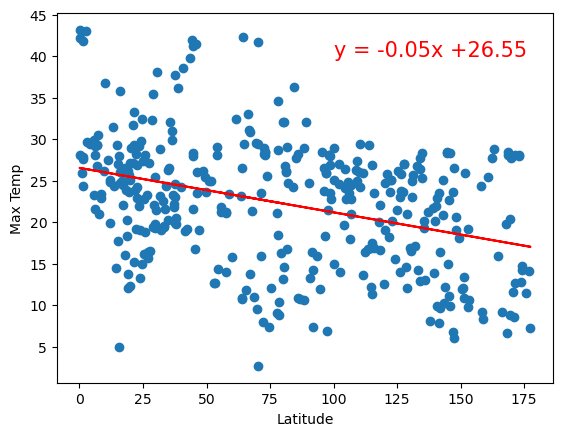

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = scipy.stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(100,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.06848099180963742


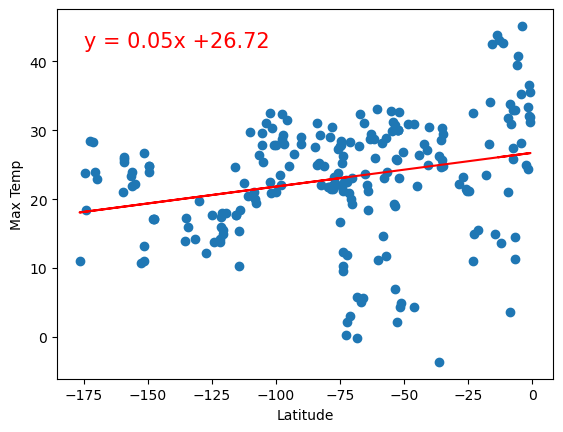

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = scipy.stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-175,42),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a very weak negative correlation between latitude and max temperature. In the Southern Hemisphere, there is a verk weak positive correlation between latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.24803624309942737


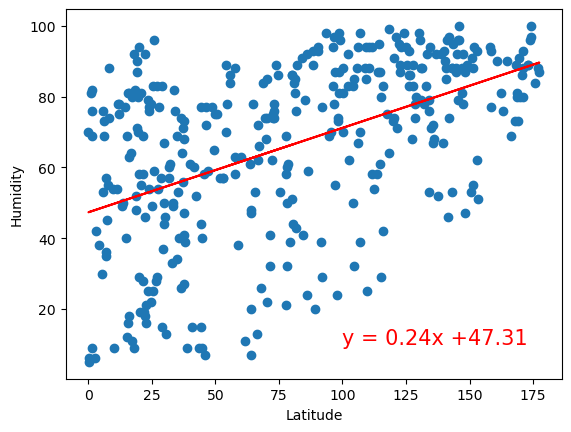

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = scipy.stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(100,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.10861485939218556


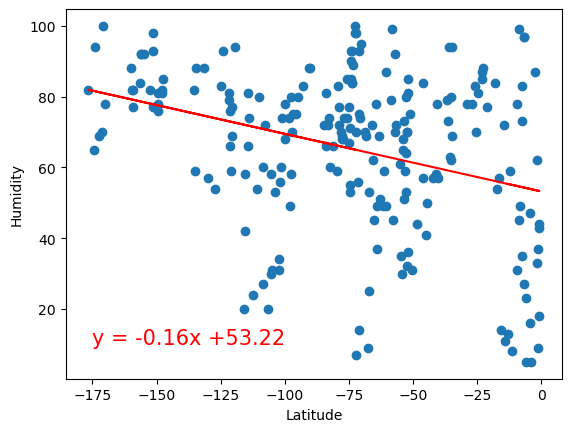

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = scipy.stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-175,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a very weak positive correlation between latitude and humidity. In the Southern Hemisphere, there is a verk weak negative correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08505613681500286


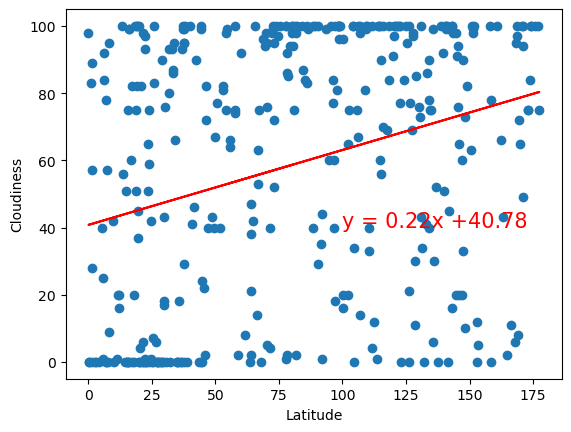

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = scipy.stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(100,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.015479767332953127


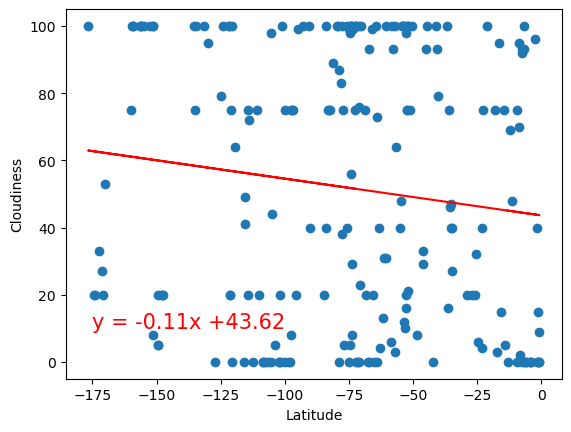

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = scipy.stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-175,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a very weak positive correlation between latitude and cloudiness. In the Southern Hemisphere, there is a verk weak negative correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01878865457737732


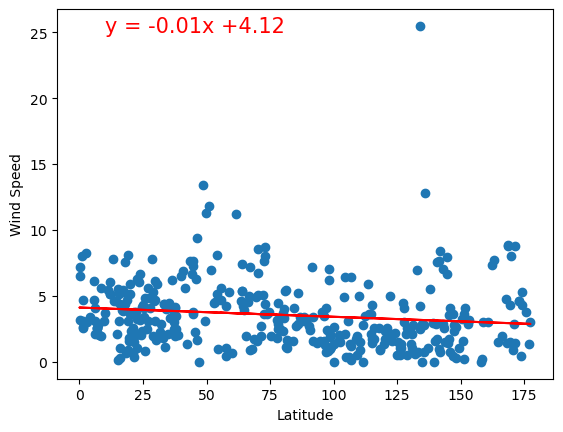

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = scipy.stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.07865940336852453


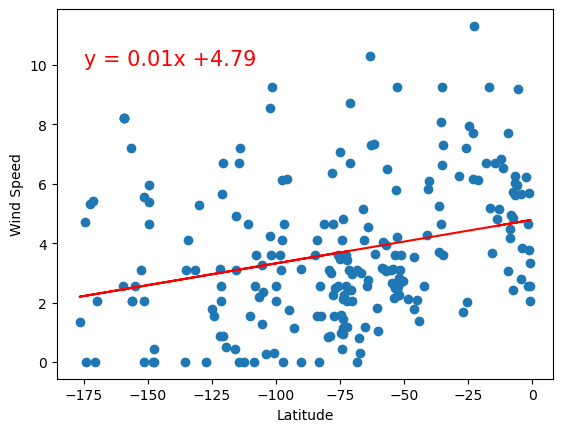

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = scipy.stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-175,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there is basically no correlation between latitude and wind speed. In the Southern Hemisphere, there is a verk weak positive correlation between latitude and wind speed.